### Randon Forest
ワインの種類をランダムフォレストを使って分類

分類精度の比較のために、決定木を使った分類も行う
(決定木を複数回行って、多数決をとったり平均をとったものがランダムフォレストである)
#### 流れ
1. データの取得・確認

2. データを特徴量とラベルに分離

3. 特徴量・ラベルともに訓練データとテストデータに分離

4. 訓練データよりモデルを作成、テストデータからモデルの当てはまりの良さ(ここでは正解率を使用)を確認

5. グリッドサーチにより、パラメータを複数候補用意した時の精度を確認

6. 特徴量の重要度確認

In [36]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
#データの取得
from sklearn.datasets import load_wine
wine_data = load_wine()

In [2]:
#データの中身の確認
import pandas as pd
df_wine_data = pd.DataFrame(wine_data.data, columns=wine_data.feature_names)
df_wine_class = pd.Series(wine_data.target)
print("(全データ数, 特徴量数) → ", df_wine_data.shape, "\n")
print("ワインの種類(=ラベル、今回は3種類)とそれぞれのデータ数")
#ワイン数値ラベル(0,1,2)を文字ラベルに置き換えて、ラベルごとのデータ数を取得
print(df_wine_class.replace([0,1,2], wine_data.target_names).value_counts(), "\n")
print("ワインの特徴量(数値は全178データのうち5データの例)")
df_wine_data.head()

(全データ数, 特徴量数) →  (178, 13) 

ワインの種類(=ラベル、今回は3種類)とそれぞれのデータ数
class_1    71
class_0    59
class_2    48
dtype: int64 

ワインの特徴量(数値は全178データのうち5データの例)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [3]:
#欠損値はなく、質的データもないため、今回データの前処理は行わない
df_wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
alcohol                         178 non-null float64
malic_acid                      178 non-null float64
ash                             178 non-null float64
alcalinity_of_ash               178 non-null float64
magnesium                       178 non-null float64
total_phenols                   178 non-null float64
flavanoids                      178 non-null float64
nonflavanoid_phenols            178 non-null float64
proanthocyanins                 178 non-null float64
color_intensity                 178 non-null float64
hue                             178 non-null float64
od280/od315_of_diluted_wines    178 non-null float64
proline                         178 non-null float64
dtypes: float64(13)
memory usage: 18.2 KB


In [4]:
#データを特徴量とラベルに分離
x = df_wine_data
y = df_wine_class

In [5]:
#特徴量・ラベルともに訓練データとテストデータに分離
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, shuffle=True, random_state=0)

決定木での正解率 →  0.9166666666666666 

決定木での分類結果の混合行列(各行名・列名はラベル)


Text(91.68, 0.5, 'actual value')

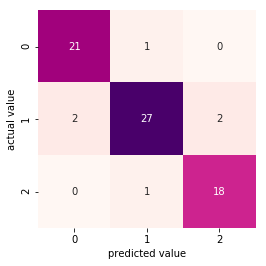

In [6]:
#訓練データよりモデルを作成、テストデータからモデルの当てはまりの良さ(ここでは正解率を使用)を確認
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
#決定木での分類モデル作成
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(random_state=0)
tree_clf.fit(x_train, y_train)
tree_score = tree_clf.score(x_test, y_test)
print("決定木での正解率 → ", tree_score, "\n")
#混合行列の作成(正解値(y_test)と予測値(y_pred_tree)の用意)
print("決定木での分類結果の混合行列(各行名・列名はラベル)")
y_pred_tree = tree_clf.predict(x_test)
mat_tree = confusion_matrix(y_test, y_pred_tree)
sns.heatmap(mat_tree, square=True, annot=True, cbar=False, fmt="d", cmap="RdPu")
plt.xlabel("predicted value")
plt.ylabel("actual value")

ランダムフォレストでの正解率 →  0.9583333333333334 

ランダムフォレストでの分類結果の混合行列(各行名・列名はラベル)


Text(91.68, 0.5, 'actual value')

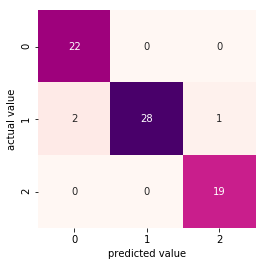

In [7]:
#ランダムフォレストでの分類モデル作成
from sklearn.ensemble import RandomForestClassifier
random_forest_clf = RandomForestClassifier(random_state=0)
random_forest_clf.fit(x_train, y_train)
random_forest_score = random_forest_clf.score(x_test, y_test)
print("ランダムフォレストでの正解率 → ", random_forest_score, "\n")
#混合行列の作成(正解値(y_test)と予測値(y_pred_random_forest)の用意)
print("ランダムフォレストでの分類結果の混合行列(各行名・列名はラベル)")
y_pred_random_forest = random_forest_clf.predict(x_test)
mat_RF = confusion_matrix(y_test, y_pred_random_forest)
sns.heatmap(mat_RF, square=True, annot=True, cbar=False, fmt="d", cmap="RdPu")
plt.xlabel("predicted value")
plt.ylabel("actual value")

In [67]:
#グリッドサーチにより、パラメータを複数候補用意した時の精度を確認
from sklearn.model_selection import GridSearchCV
import numpy as np
parameters = {"max_depth": [i for i in range(2,6,2)],
              "max_leaf_nodes": [i for i in range(10,50,10)], 
              #"min_samples_split": [i for i in range(5,100,5)], 
              "min_samples_leaf": [i for i in range(2,50,5)], 
              "max_features": ["auto", "log2"], 
              "criterion": ["gini", "entropy"], 
              "class_weight": ["balanced"], 
              "min_impurity_decrease": [i for i in np.arange(0,2.0,0.5)], 
              "n_estimators": [i for i in range(50,200,50)]}
#min_samples_split…各ノードの最高データ数(この値以下になるまでノードを分岐させる)
#min_samples_leaf…各ノードの最低データ数(この値以下になったら分岐を止める)

In [68]:
import warnings
warnings.filterwarnings('ignore')
RF_gridSearchClf_wine = GridSearchCV(RandomForestClassifier(random_state=0),
                                     parameters,
                                     cv=3, #クロスバリデーションの分割数
                                     verbose=True, #ログ表示
                                     n_jobs=-1) #並列処理
RF_gridSearchClf_wine.fit(x_train, y_train)
#学習済みデータを保存
from sklearn.externals import joblib
joblib.dump(RF_gridSearchClf_wine, 'RF_GridSearch_wine_ver3.pkl')

Fitting 3 folds for each of 3840 candidates, totalling 11520 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   15.2s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   29.5s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:   46.3s
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 4992 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 6042 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 7192 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 8442 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 9792 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 11242 tasks      |

['RF_GridSearch_wine_ver3.pkl']

In [76]:
#保存したモデルの読み込み
from sklearn.externals import joblib
RF_gridSearchClf_wine_loaded = joblib.load("RF_GridSearch_wine_ver3.pkl")
#グリッドサーチによって決められた最適なパラメータの取得・表示
RF_GridSearch_wine_predictor = RF_gridSearchClf_wine_loaded.best_estimator_
print('Best parameters:')
for key, value in RF_gridSearchClf_wine_loaded.best_params_.items():
    print('\t{0:21s} : {1}'.format(key, value))
print('Best cross-validation: {}'.format(RF_gridSearchClf_wine_loaded.best_score_))
#各特徴量の重要度
print('Feature Importances:')
for index, feature_names in enumerate(wine_data.feature_names):
    print('\t{0:28s} : {1:>.6f}'.format(feature_names, predictor.feature_importances_[index]))

Best parameters:
	class_weight          : balanced
	criterion             : gini
	max_depth             : 2
	max_features          : auto
	max_leaf_nodes        : 10
	min_impurity_decrease : 0.0
	min_samples_leaf      : 2
	n_estimators          : 50
Best cross-validation: 0.9811320754716981
Feature Importances:
	alcohol                      : 0.081063
	malic_acid                   : 0.029009
	ash                          : 0.008393
	alcalinity_of_ash            : 0.028789
	magnesium                    : 0.011755
	total_phenols                : 0.058232
	flavanoids                   : 0.184767
	nonflavanoid_phenols         : 0.009320
	proanthocyanins              : 0.032829
	color_intensity              : 0.136374
	hue                          : 0.099477
	od280/od315_of_diluted_wines : 0.131839
	proline                      : 0.188154


ランダムフォレストでのグリッドサーチ後の正解率 →  0.9722222222222222 

ランダムフォレストでグリッドサーチ後の分類結果の混合行列(各行名・列名はラベル)


Text(91.68, 0.5, 'actual value')

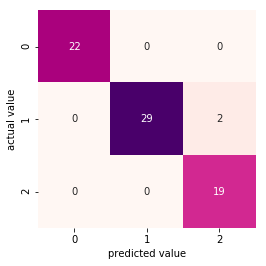

In [77]:
random_forest_GridSearch_score = RF_GridSearch_wine_predictor.score(x_test, y_test)
print("ランダムフォレストでのグリッドサーチ後の正解率 → ", random_forest_GridSearch_score, "\n")
#混合行列の作成(正解値(y_test)と予測値(y_pred_random_forest)の用意)
print("ランダムフォレストでグリッドサーチ後の分類結果の混合行列(各行名・列名はラベル)")
y_pred_random_forest_GridSearch = RF_GridSearch_wine_predictor.predict(x_test)
mat_RF_GridSearch = confusion_matrix(y_test, y_pred_random_forest_GridSearch)
sns.heatmap(mat_RF_GridSearch, square=True, annot=True, cbar=False, fmt="d", cmap="RdPu")
plt.xlabel("predicted value")
plt.ylabel("actual value")